<a href="https://colab.research.google.com/github/aso1801028/AI_teach2020/blob/master/2020AI0302_detect_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
#oprnCV
import cv2
import urllib.request as req

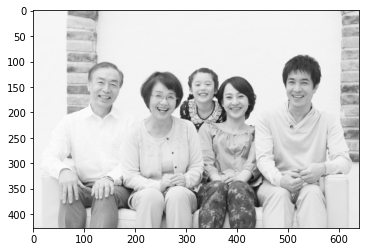

In [2]:
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
savefile = "family.png"
req.urlretrieve(url,savefile)
img = cv2.imread(savefile)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml"
cascade_file = "cascade_file.xml"
req.urlretrieve(url,cascade_file)
cascade=cv2.CascadeClassifier(cascade_file)

In [4]:
face_list = cascade.detectMultiScale(img_gray, minSize=(50,50))
if len(face_list) == 0:
  print("検出数はゼロでした")
else:
  print("検出数:",len(face_list),"件")


検出数: 5 件


In [5]:
for (x,y,w,h) in face_list:
  print("顔の座標: x=",x,"y=",y,"横幅W",w,"縦幅=",h)
  blue = (255,0,0)
  cv2.rectangle(img,(x,y),(x+w,y+h),blue,thickness=20)

顔の座標: x= 487 y= 117 横幅W 66 縦幅= 66
顔の座標: x= 112 y= 118 横幅W 67 縦幅= 67
顔の座標: x= 304 y= 122 横幅W 58 縦幅= 58
顔の座標: x= 226 y= 146 横幅W 62 縦幅= 62
顔の座標: x= 367 y= 148 横幅W 59 縦幅= 59


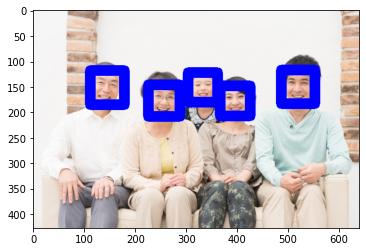

In [8]:
cv2.imwrite("face-detect.png",img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

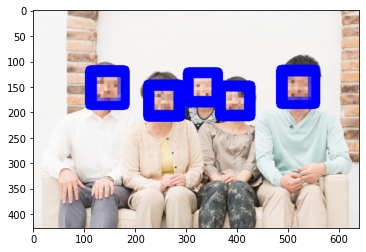

In [10]:
#モザイクを書ける設定
def mosaic(img,rect,size):
  (x1,y1,x2,y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2,x1:x2]
  i_small = cv2.resize(i_rect,(size,size))
  i_mos = cv2.resize( i_small,(w,h),interpolation=cv2.INTER_AREA)
  img2=img.copy()
  img2[y1:y2,x1:x2] = i_mos
  return img2

#出力
for( x, y, w, h )in face_list:
  img = mosaic(img, (x, y, x+w, y+h), 10 )
cv2.imwrite("family-mosaic.png",img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

